In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a file path
census_data = pd.read_csv("Resources/census_data_clean_monthly_owner_costs.csv")

# Read in the data. 
census_data.head()

,Owner_Occupied_Units,Owner_White_alone,Owner_Black_African_American_alone,Owner_American_Indian_Alaska_Native_alone,Owner_Asian_alone,Owner_Native_Hawaiian_Other_Pacific_Islander_alone,Owner_Some_other_race_alone,Owner_Two_or_more_races,Owner_White_no_Hispanic_or_Latino,Owner_Hispanic_Latino,...,Black_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_Pacific_Islander,Other_Race,Two_More_Races,Count_Inds_Income_Past_12_Mos_<_Pov_Level,state,Zip_code,year
0,3283.0,2604.0,13.0,6.0,0.0,0.0,623.0,37.0,0.0,3283.0,...,27.0,6.0,0.0,0.0,1233.0,63.0,10552.0,72.0,601,2019
1,9528.0,8298.0,239.0,0.0,0.0,0.0,238.0,753.0,553.0,8975.0,...,341.0,12.0,0.0,0.0,375.0,1124.0,18653.0,72.0,602,2019
2,11118.0,9141.0,394.0,22.0,26.0,0.0,1381.0,154.0,86.0,10998.0,...,758.0,42.0,47.0,0.0,2710.0,232.0,23691.0,72.0,603,2019
3,1470.0,717.0,6.0,10.0,0.0,0.0,716.0,21.0,4.0,1466.0,...,6.0,10.0,0.0,0.0,963.0,29.0,4185.0,72.0,606,2019
4,6758.0,5612.0,127.0,0.0,0.0,0.0,458.0,561.0,244.0,6493.0,...,173.0,0.0,0.0,0.0,643.0,744.0,12204.0,72.0,610,2019


In [3]:
# Median monthly owner cost over time
median_owner_cost_by_year = census_data.groupby('year')['Median_Monthly_Owner_Costs'].median()
median_owner_cost_by_year

year
2019    1233.5
2020    1259.0
2021    1322.0
2022    1426.0
Name: Median_Monthly_Owner_Costs, dtype: float64

R-squared: 0.9301


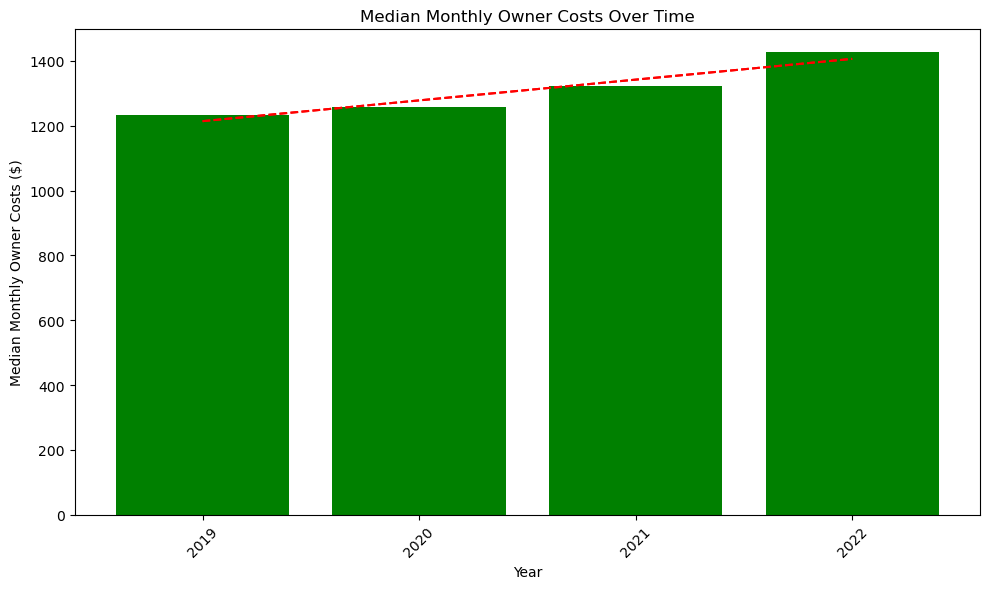

In [7]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_owner_cost_by_year.index, median_owner_cost_by_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Median Monthly Owner Costs ($)')
plt.title('Median Monthly Owner Costs Over Time')
plt.xticks(median_owner_cost_by_year.index, rotation=45)
plt.tight_layout()

# Fit a regression line
x = median_owner_cost_by_year.index
y = median_owner_cost_by_year.values
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')

# Calculate R-squared value
y_pred = trendline
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')


# Save the plot as a file
plt.savefig('median_owner_cost_by_year19_22.png', format='png', dpi=300)

# Show the plot
plt.show()